In [ ]:
# 2. ders
# Class chat soru: Scaling yapacak mıyız? 
# Ares hoca : Distance-base model olduğu için yapacağız evet

# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()  # Dikkat edersek label yok

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.describe() # Outlier yok

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


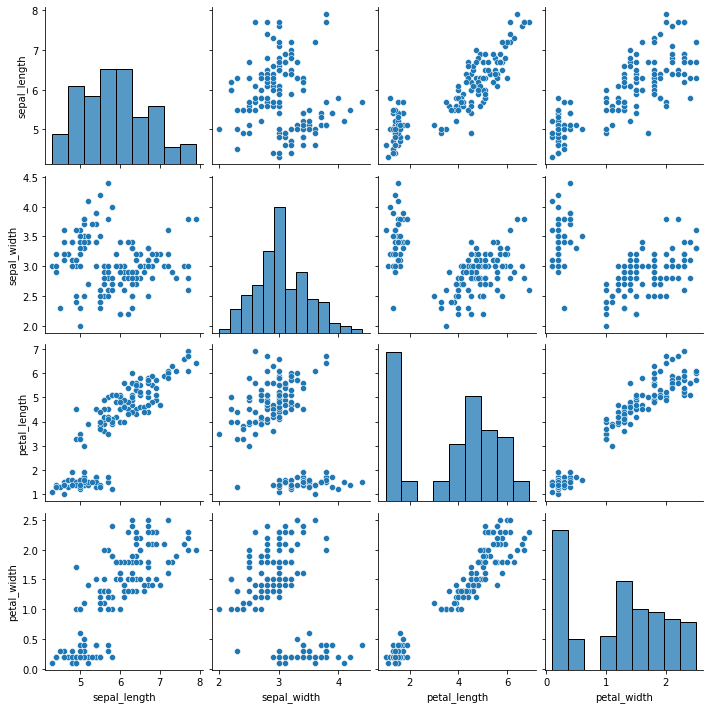

In [6]:
sns.pairplot(df);
# Mümkün mertebe az feature ile kümeleme yapmak lazım. Feature sayısı arttıkça kümeleme yapmak çok iyi olmuyor
# Şekillere bakarak 2 tane küme yapmanın daha mantıklı olduğu söylenebilir
# Alttaki ekran görüntüsüne bakalım(Şekilden sonra). Sağdaki Clusterdaki varyans büyük görünüyor(Daha çok alana yayılmış). 
# .. O yüzden onu da 2 ye bölebiliriz(2. ekran görüntüsü)

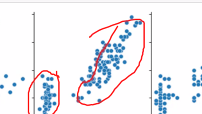

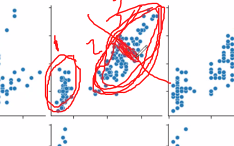

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You should try data both with and without scale and continue with whichever one has good results.

## Hopkins Test

- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 0, the more available to separate clusters

In [7]:
#!pip install pyclustertend

In [8]:
from pyclustertend import hopkins

In [9]:
X = df.copy()

In [10]:
hopkins(X, X.shape[0]) # 0-0.5 arasında. Kümelemeye yatkın olduğunu gördük hopkins test kullanarak

0.16004084162692528

## Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
#dendrogram()

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [13]:
# Bu 4 linkage metodu üzerinden dendogram çizdireceğiz
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete") 
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

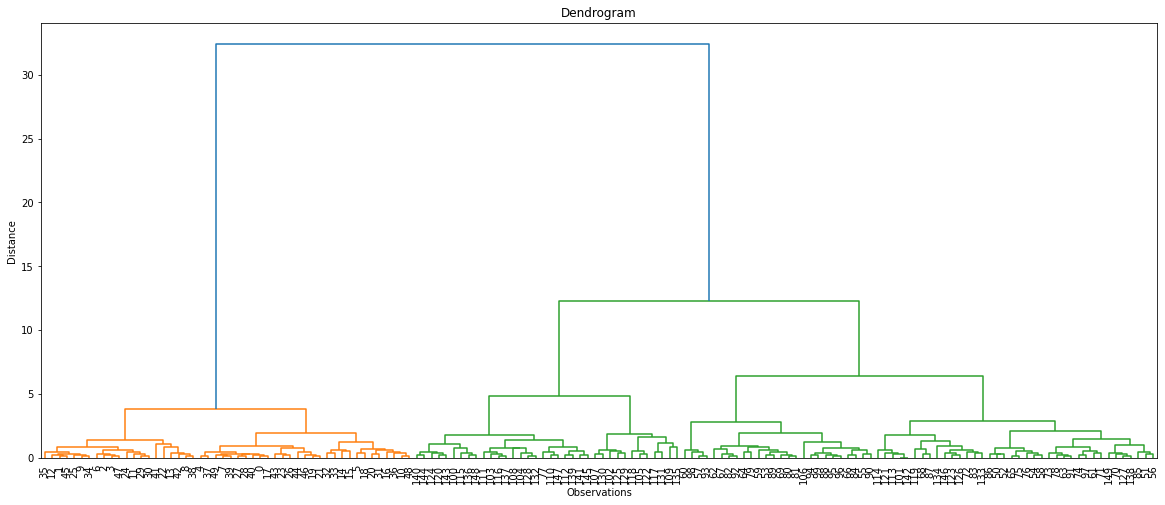

In [14]:
# Ward için dendogram
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);
# Altta karşılaştırmalı bakalım

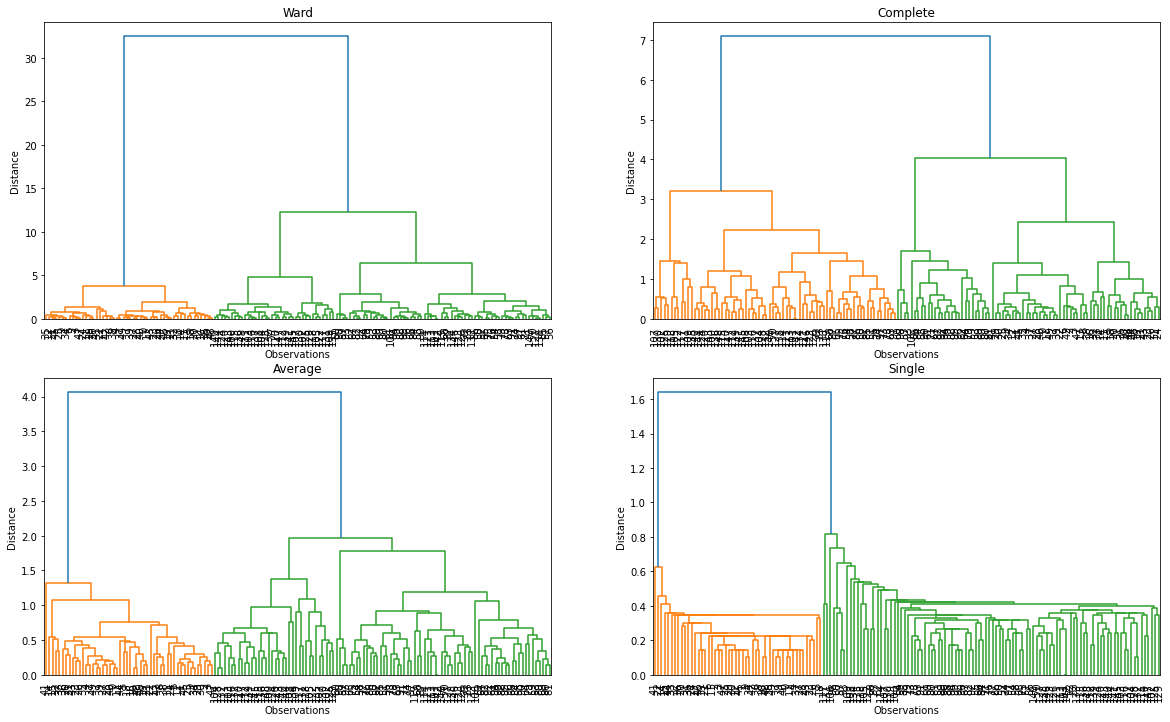

In [15]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")  
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

# Hangisi daha iyi insight sağlıyor?(Alttaki ekran görüntülerine bakılabilir)
# Ward: Mavi çizgi bize 2 cluster a ayırabilirsin diyor. Kümelerin birbirlerine olan uzaklıklarına bakalım.
# .. aradaki mesafe 20 birim
# Complete: Mavi çizgi bize 2 cluster a ayırabilirsin diyor aynı şekilde
# .. aradaki mesafe 3 birim
# Average : Mavi çizgi bize 2 cluster a ayırabilirsin diyor aynı şekilde
# .. aradaki mesafe 2 birim
# Single  : Mavi çizgi bize 2 cluster a ayırabilirsin diyor aynı şekilde
# .. aradaki mesafe 0.8 birim

# Mesafelerin en uzak olduğu "ward"(20 birim). Ward kullanacağız. Genelde de ward kullanılır

# Burada alttaki data noktaları karışık görünüyor "truncate_mode" u "p" ile beraber kullanırsak daha güzel bir çıktı gelir

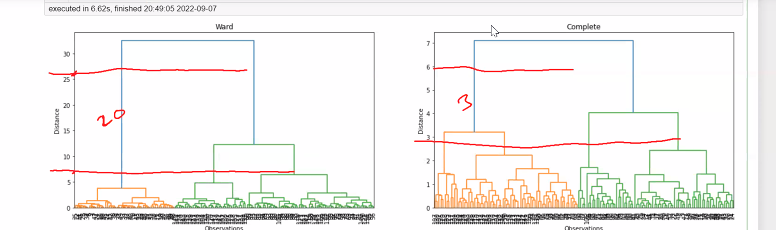

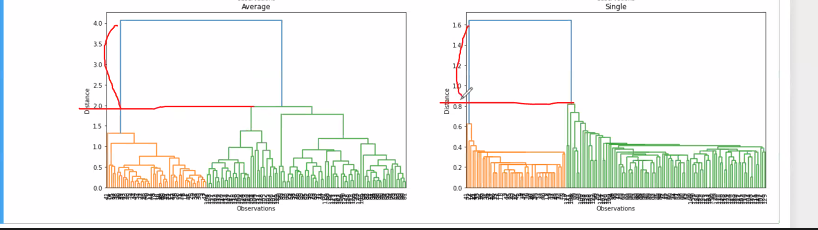

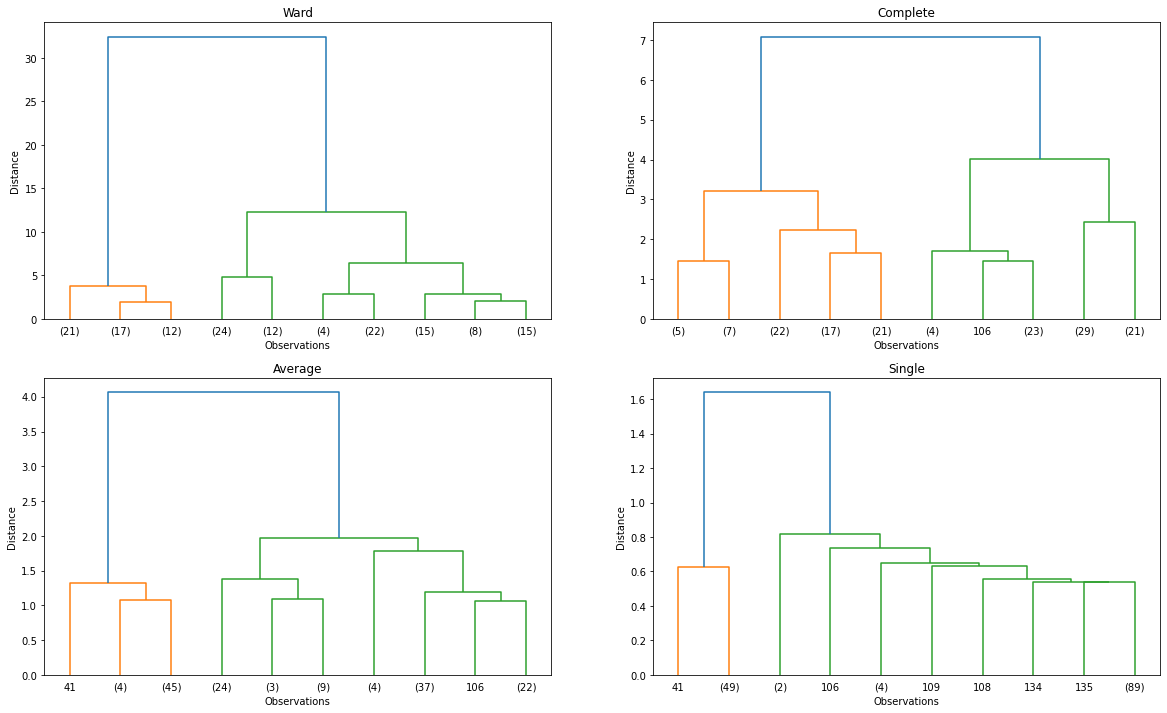

In [16]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10) # truncate_mode='lastp', p=10 (10 küme gösterir)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);7

# p=10 ağacın altında kaç küme olsun.
# Ares Hoca: Sadelik adına üstteki çıktı bu şekilde kullanılabilir

# Modelin bize tavsiye ettiği 2 cluster a böl. Ama biz böyle devam edecek değiliz. 
# Silhoutte score a bakalım bize yardımcı olacaktır

## Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance

In [17]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

In [ ]:
# a:Bir datanın ait olduğu cluster içerisindeki noktalara olan uzaklıklarını hesaplayıp ortalaması
# a:Bir datanın  diğer cluster içerisindeki tüm data noktalarına uzaklarını hesaplayıp ...

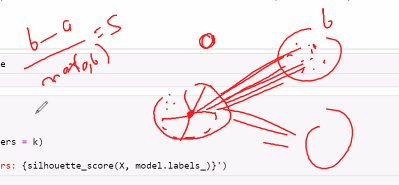

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

# Class chat soru: K arttığında slihoutte score her zaman düşüyor mu?. Denk geldiklerimin hepsinde k arttıkça score düşüyor du
# Ares hoca: k arttıkça silhoutte score düşer çünkü silhoutte score kümeleme kalitesini gösterir
# .. Çünkü mesela alttaki ekran görüntüsünde sağ tarafı 3 e bölersek daha çok nokta iç içe girecek ve silhoutte score düşecek

Silhouette Score for 2 clusters: 0.686735073276978
Silhouette Score for 3 clusters: 0.5543236611296424
Silhouette Score for 4 clusters: 0.48896708575546965
Silhouette Score for 5 clusters: 0.48438258927906
Silhouette Score for 6 clusters: 0.3592376192603087
Silhouette Score for 7 clusters: 0.3422071936620505
Silhouette Score for 8 clusters: 0.3435906599119542
Silhouette Score for 9 clusters: 0.3304886352874661


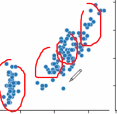

In [20]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward") # default değerler
model1.fit_predict(X)
# Dataların ait olduğu sınıfları getirdik.
# 3 e bölmüş olduk(0-1-2 şeklinde)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [21]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

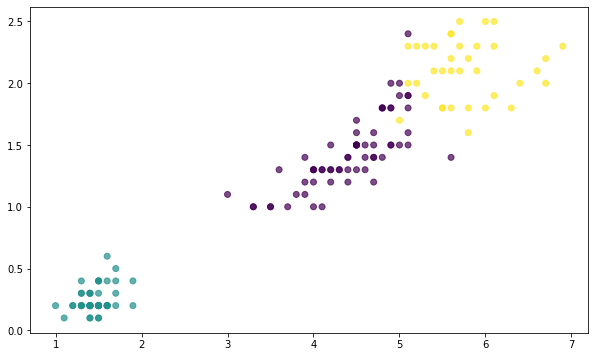

In [22]:
plt.scatter(X["petal_length"], X["petal_width"], c = model1.labels_, cmap = "viridis", alpha =0.7)
# 2 feature bazında baktığımızda "setosa" nın iyi ayrıştığını söylüyoruz(Sol attaki yeşiller)
# Virginica ve versicolor da birbirine karışan noktalarda hata yapıyor(Mor ve sarılar)

In [23]:
clusters = model1.labels_     # Tahmin edilen değerler

In [24]:
labels = pd.read_csv("label.csv")  # Gerçek değerler
labels

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [25]:
# Tahmin ettiğim değerler ile gerçek değerleri kıyaslayacağız
X["predicted_clusters"] = clusters
X["labels"] = labels
X

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,0,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [26]:
ct = pd.crosstab(X["predicted_clusters"], X["labels"])
ct
# Modelimizin kaç tane hata yaptığını görüyoruz.
# 0: 49 tane versicolor, 15 tane virginica
# 1: 50 tane setosa
# 2: 1 versicolor , 35 tane virginica
# 15+1=16 tane hatalı gruplama yapmış modelimiz

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


## ARI Score

- The Adjusted Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The value of ARI indicates no good clustering if it is close to zero or negative, and a good cluster if it is close to 1.

In [ ]:
# Elinizde gerçek etiketler varsa ARI score u kullanabiliyorduk. Bizde de etiketler var.
# Tahmin edilen değerler ile gerçek değerleri karşılaştıınca elde ettiğimiz bir skordu

In [27]:
from sklearn.metrics.cluster import adjusted_rand_score

In [28]:
adjusted_rand_score(X.labels, X.predicted_clusters)  # 0.73. Modelimiz yüzde 73 başarılıymış

0.7311985567707746

## Visualization Clusters

In [29]:
X_labels = X.labels.map({"versicolor":0, "setosa":1,"virginica":2})  # Gerçek labellarımızı map liyoruz
X_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

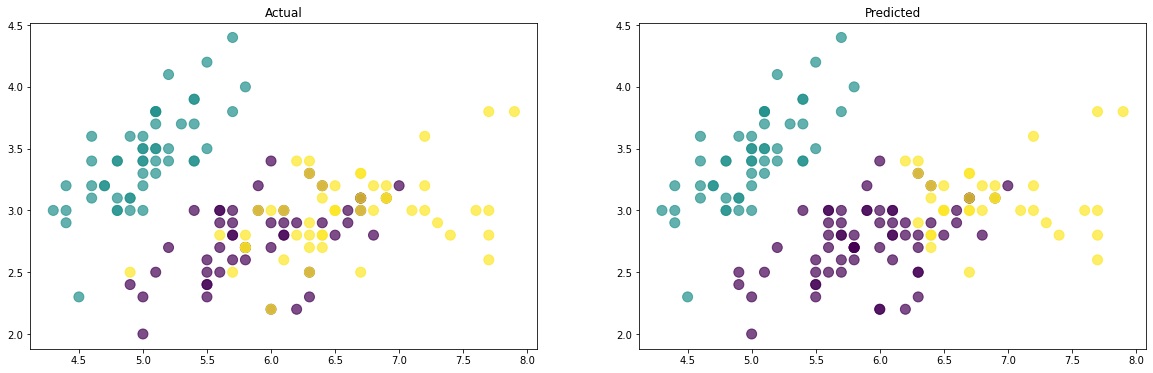

In [30]:
# 4 feature var elimde. Hangi featureları seçerek gruplama yapsak daha mantıklı olur. 
# Bunu anlamaya çalışıyoruz burada görsellere bakarak

plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

# Versicolor ile virginica iç içe girmiş "Actual" da
# "Predicted" de nerelerde hata yaptığımızı görebiliyoruz

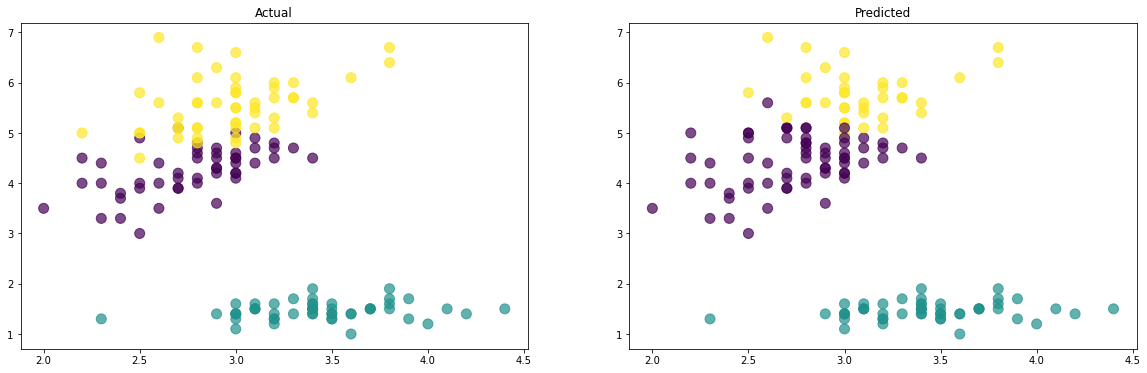

In [31]:
# 4 feature var elimde. Hangi featureları seçerek gruplama yapsak daha mantıklı olur. 
# Bunu anlamaya çalışıyoruz burada görsellere bakarak

plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_width"], X["petal_length"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

# Buradan anlaşılmıyor. Biz line plot çizdirerek anlamaya çalışalım alttaki işlemlerle

## Remodeling according to discriminating features

In [32]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [33]:
clus_pred = X.iloc[:, [0, 1, 2, 3, 5]].groupby("labels").mean().T
clus_pred
# Feature ların sınıf bazında ortalamaları(Gerçek etiketlere göre)

labels,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


<AxesSubplot:>

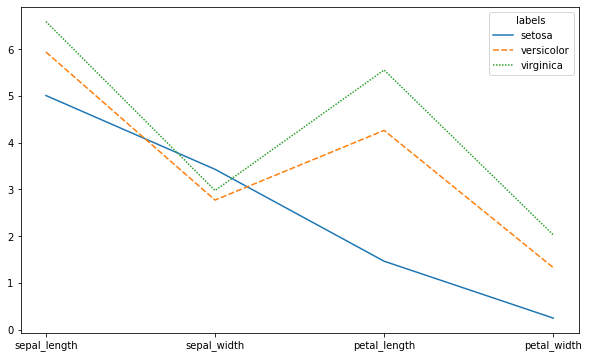

In [34]:
sns.lineplot(data = clus_pred)
# sepal_length sınıflama açısından çok iyi bir feature değil gibi
# sepal_width sınıflama  açısından çok iyi bir feature değil
# petal length de line lar uzak. Uygun bir feature
# petal_width  de line lar uzak. Uygun bir feature

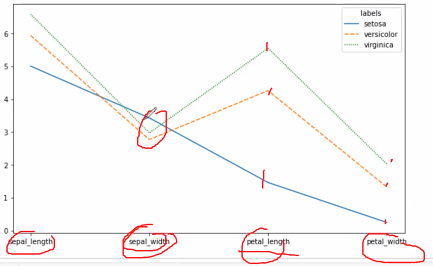

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(141)
sns.boxplot(y = "sepal_length", x = "labels", data = X)
plt.subplot(142)
sns.boxplot(y = "sepal_width", x = "labels", data = X)
plt.subplot(143)
sns.boxplot(y = "petal_length", x = "labels", data = X)
plt.subplot(144)
sns.boxplot(y = "petal_width", x = "labels", data = X)

# Çıktı yok, kod silindi tekrar ekledim çalıştırmadım hatalar olabilir diye.

# Sağdaki boxplotlara bakarak iyi ayrıldıklarını söyleyebiliriz
# Sağdaki boxplotlara bakarak içi içe geçmeler görebiliriz

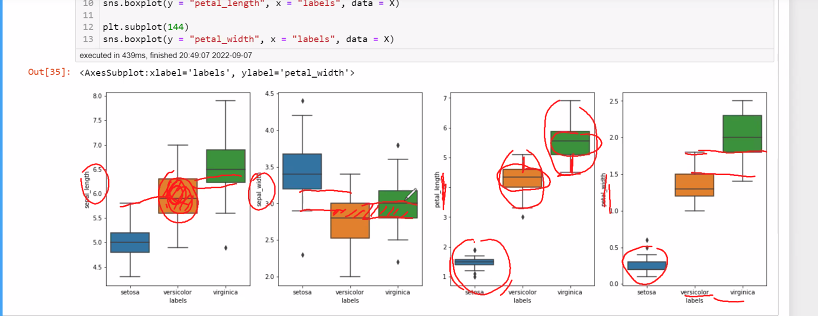

In [36]:
X2 = X.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Hopkins Test

In [37]:
hopkins(X2, X2.shape[0])  # Kümelemeye daha uygun hale geldi. Skordan anlıyoruz

0.11655014470189602

### Dendrogram

In [38]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

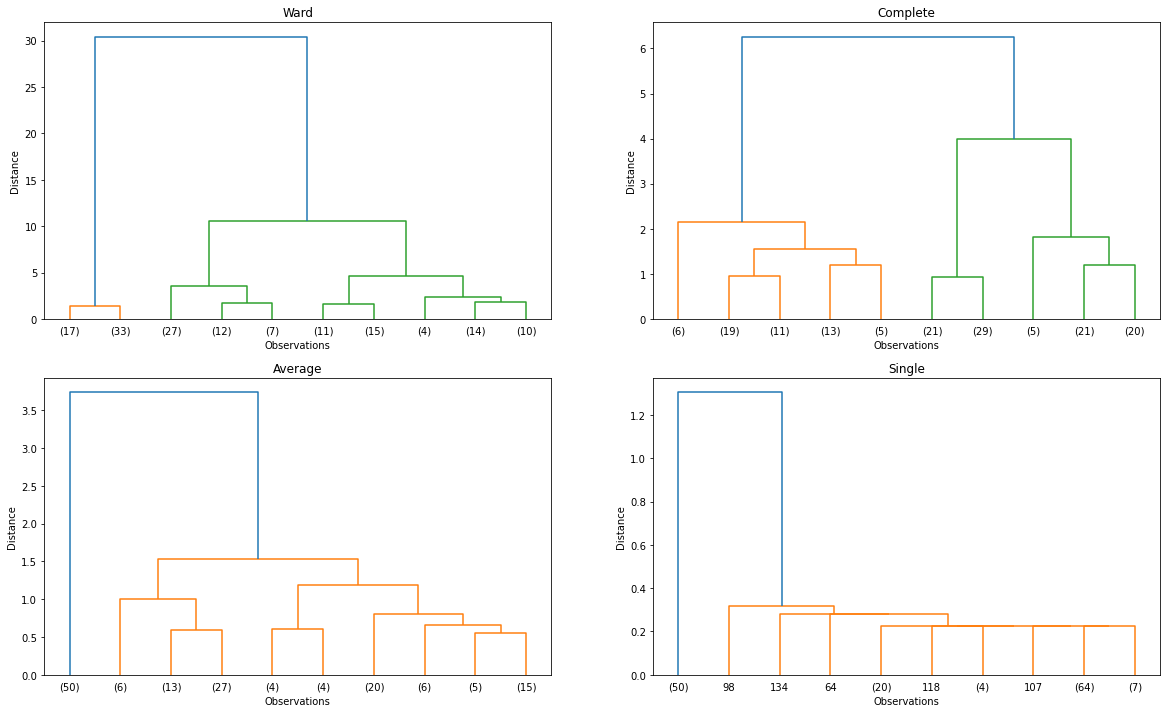

In [39]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

# Class caht soru: sistemde birisi 2 birisi 3 onermez bize degil mi ?
# Ares hoca: Farklı önerilerde olabiliyor. ward:2 cluster yap derken single: 10 cluster yap diyebilir

### S(Silhouette) Score

In [40]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')
# 2 feature ile olan Silhouette skorlar
# Dendogram ve silhoutte skor 2 clusterlı kümelemenin daha iyi olduğunu söylüyor. 
# Ancak biz domain bilgisine göre 3 cluster ile devam edeceğiz

Silhouette Score for 2 clusters: 0.7669465622893307
Silhouette Score for 3 clusters: 0.6573949270307473
Silhouette Score for 4 clusters: 0.5895284483082736
Silhouette Score for 5 clusters: 0.5781917221789421
Silhouette Score for 6 clusters: 0.574738090950023
Silhouette Score for 7 clusters: 0.5830818101061305
Silhouette Score for 8 clusters: 0.5678904788273494
Silhouette Score for 9 clusters: 0.54699100118714


In [ ]:
# 4 feature ile olan Silhouette skorlar
# 2 feature da skorlar yükselmiş. Yani kümeleme kalitesi artmış

## Final model

In [41]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = final_model.fit_predict(X2) # Modelin tahmin ettiği clusterlar

In [42]:
X2["predicted_clusters"] = clusters
X2["labels"] = labels
X2

,petal_length,petal_width,predicted_clusters,labels
0,1.4,0.2,1,setosa
1,1.4,0.2,1,setosa
2,1.3,0.2,1,setosa
3,1.5,0.2,1,setosa
4,1.4,0.2,1,setosa
...,...,...,...,...
145,5.2,2.3,0,virginica
146,5.0,1.9,0,virginica
147,5.2,2.0,0,virginica
148,5.4,2.3,0,virginica


In [43]:
X2_ct = pd.crosstab(X2["predicted_clusters"], X2["labels"])
X2_ct
# 5+1 = 6 adet hata yapmışız
# 2 feature ile modelleyerek daha iyi tahmin daha az hata yapmış olduk

# class chat soru: clustering algoritmalarında cross validation yapılabiliyor mu?
# Ares Hoca: Yapılmıyor

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,5,49
1,50,0,0
2,0,45,1


In [44]:
ct # Önceki sonuçlar

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [45]:
X2_labels = X2.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X2_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

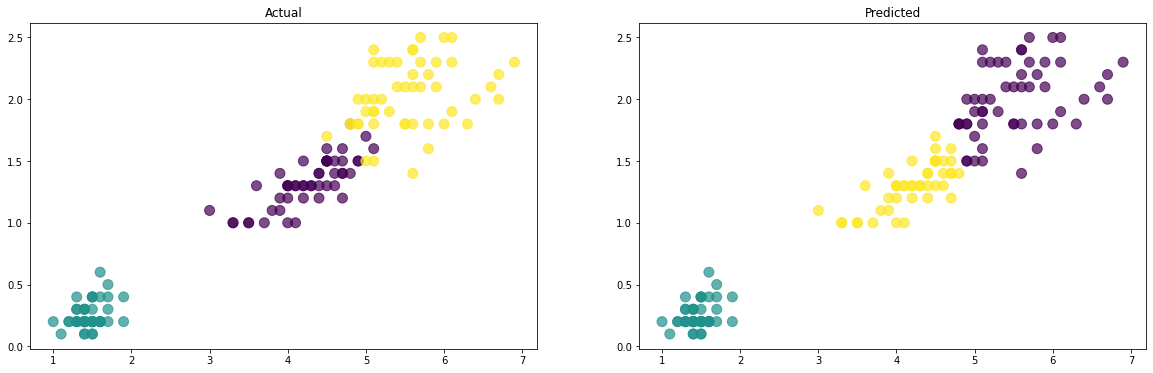

In [46]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

### ARI Score

In [47]:
adjusted_rand_score(X2.labels, X2.predicted_clusters)
# 2 feature ile yaptığım kümelemenin iyi olduğunu ARI scorea bakarak da anlıyoruz

0.8857921001989628

## Prediction cluster of new data

In [48]:
new_data = [[1.7, 0.2], [2.3, 0.5]]

In [49]:
final_model.predict(new_data) 
# HATA: Bu algoritmanın tahmin özelliği yok onun için hata verdi,gözlemleri dataya atayıp model kurduktan sonra sınıfları belirleyebiliriz

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'